In [2]:
# Load necessary packages
# %pylab notebook
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
# import scipy as sp
# from scipy.sparse import linalg as ln
from IPython.display import HTML
from random import choices
import math
import itertools
from os import path
from decimal import Decimal 

try:
    plt.style.use('classic')
except:
    pass

# Use ODEINT to solve the differential equations defined by the vector field
# from scipy.integrate import odeint
# from scipy.integrate import solve_ivp

# Manna Model: Simulating larger height thresholds from distributions

## Defining the distribution

We are interseted in distributing height units of failing sites by drawing from a distribution, rather then randomly determining the direction -per height unit. The distribution will tells us the final configuration after a site fails. 

The total number of configurations for distributed $h$ indistinguishable balls into $4$ distinguishable basekts is
$${h+4-1}\choose{h}$$

In [6]:
def prob_1(h, h1, h2, h3, h4): 
    denom = all_factorials[h1]*all_factorials[h2]*all_factorials[h3]*all_factorials[h4]*all_factorials[h - h1 - h2 - h3 - h4]
    return float(all_factorials[h]/denom/bigZ)

def prob(h, h1, h2, h3, h4): 
    denom = math.factorial(h1)*math.factorial(h2)*math.factorial(h3)*math.factorial(h4)*math.factorial(h - h1 - h2 - h3 - h4)
    bigZ = 4**h
    return float(Decimal(math.factorial(h))/Decimal(int(denom)) / Decimal(int(bigZ)))

def prob_array(hc): 
    combinations = []
    for h1 in range(0,hc+1): 
        for h2 in range(0,hc+1-h1): 
            for h3 in range(0,hc+1-h1-h2): 
                combinations += [[h1, h2, h3, hc-h1-h2-h3]]
    
    probArray = []
    for combo in combinations: 
        probArray += [prob_1(hc, combo[0], combo[1], combo[2], combo[3])]
    
    return combinations, probArray

# combinations, probArray = prob_array(16)

# print('total=', len(combinations))
# for i in combinations: 
#     print(i)
# print(combinations)
# print(probArray)

In [39]:
def prob_array_1(hc): 
    combo_n = 0
    for h1 in range(0,hc+1): 
        for h2 in range(0,hc+1-h1): 
            for h3 in range(0,hc+1-h1-h2): 
                combo_n += 1
    combinations = np.zeros((combo_n, 4), int)
    j = 0
    for h1 in range(0,hc+1): 
        for h2 in range(0,hc+1-h1): 
            for h3 in range(0,hc+1-h1-h2): 
                combinations[j,:] = np.array([h1, h2, h3, hc-h1-h2-h3])
                j += 1
    probArray = []
    for combo in combinations: 
        probArray += [prob_1(hc, combo[0], combo[1], combo[2], combo[3])]
    
    return combinations, probArray


In [11]:
hc = 4
bigZ = Decimal(4**hc)

combinations = []
total_prob = 0

for h1 in range(0,hc+1): 
    for h2 in range(0,hc+1-h1): 
        for h3 in range(0,hc+1-h1-h2): 
            combinations += [[h1, h2, h3, hc-h1-h2-h3]]
            total_prob += prob_1(hc, h1, h2, h3, hc-h1-h2-h3)
            
            print([[h1, h2, h3, hc-h1-h2-h3]], end=' ')
            print(prob(hc, h1, h2, h3, hc-h1-h2-h3))

print("found ", len(combinations))
print("expected ", 4**hc)
print("total prob (should be 1): ", total_prob)


[[0, 0, 0, 4]] 0.00390625
[[0, 0, 1, 3]] 0.015625
[[0, 0, 2, 2]] 0.0234375
[[0, 0, 3, 1]] 0.015625
[[0, 0, 4, 0]] 0.00390625
[[0, 1, 0, 3]] 0.015625
[[0, 1, 1, 2]] 0.046875
[[0, 1, 2, 1]] 0.046875
[[0, 1, 3, 0]] 0.015625
[[0, 2, 0, 2]] 0.0234375
[[0, 2, 1, 1]] 0.046875
[[0, 2, 2, 0]] 0.0234375
[[0, 3, 0, 1]] 0.015625
[[0, 3, 1, 0]] 0.015625
[[0, 4, 0, 0]] 0.00390625
[[1, 0, 0, 3]] 0.015625
[[1, 0, 1, 2]] 0.046875
[[1, 0, 2, 1]] 0.046875
[[1, 0, 3, 0]] 0.015625
[[1, 1, 0, 2]] 0.046875
[[1, 1, 1, 1]] 0.09375
[[1, 1, 2, 0]] 0.046875
[[1, 2, 0, 1]] 0.046875
[[1, 2, 1, 0]] 0.046875
[[1, 3, 0, 0]] 0.015625
[[2, 0, 0, 2]] 0.0234375
[[2, 0, 1, 1]] 0.046875
[[2, 0, 2, 0]] 0.0234375
[[2, 1, 0, 1]] 0.046875
[[2, 1, 1, 0]] 0.046875
[[2, 2, 0, 0]] 0.0234375
[[3, 0, 0, 1]] 0.015625
[[3, 0, 1, 0]] 0.015625
[[3, 1, 0, 0]] 0.015625
[[4, 0, 0, 0]] 0.00390625
found  35
expected  256
total prob (should be 1):  1.0


### Testing another algorithm (more memory-efficient)

In [13]:
def prob_array_2(hc): 
    probArray = []
    for h1 in range(0,hc+1): 
        for h2 in range(0,hc+1-h1): 
            for h3 in range(0,hc+1-h1-h2): 
                probArray += [prob_1(hc, h1, h2, h3, hc-h1-h2-h3)]
    combinations_i = np.arange(0, len(probArray), 1)
    return combinations_i, probArray

hc = 2
bigZ = Decimal(4**hc)

combinations = []
total_prob = 0

combo_i, prob_array = prob_array_2(hc)

for j in combo_i: 

    count = 0
    for h1 in range(0,hc+1): 
        for h2 in range(0,hc+1-h1): 
            for h3 in range(0,hc+1-h1-h2): 
                if j == count: 
                    print(j, end= " ")
                    print([[h1, h2, h3, hc-h1-h2-h3]], end=' ')
                    print(prob_array[j])
                    break
                else: 
                    count += 1

print("found ", len(combinations))
print("expected ", 4**hc)
print("total prob (should be 1): ", total_prob)



0 [[0, 0, 0, 2]] 0.0625
0 [[0, 1, 0, 1]] 0.0625
0 [[0, 2, 0, 0]] 0.0625
0 [[1, 0, 0, 1]] 0.0625
0 [[1, 1, 0, 0]] 0.0625
0 [[2, 0, 0, 0]] 0.0625
1 [[0, 0, 1, 1]] 0.125
1 [[0, 1, 0, 1]] 0.125
1 [[0, 2, 0, 0]] 0.125
1 [[1, 0, 0, 1]] 0.125
1 [[1, 1, 0, 0]] 0.125
1 [[2, 0, 0, 0]] 0.125
2 [[0, 0, 2, 0]] 0.0625
2 [[0, 1, 0, 1]] 0.0625
2 [[0, 2, 0, 0]] 0.0625
2 [[1, 0, 0, 1]] 0.0625
2 [[1, 1, 0, 0]] 0.0625
2 [[2, 0, 0, 0]] 0.0625
3 [[0, 1, 0, 1]] 0.125
3 [[0, 2, 0, 0]] 0.125
3 [[1, 0, 0, 1]] 0.125
3 [[1, 1, 0, 0]] 0.125
3 [[2, 0, 0, 0]] 0.125
4 [[0, 1, 1, 0]] 0.125
4 [[0, 2, 0, 0]] 0.125
4 [[1, 0, 0, 1]] 0.125
4 [[1, 1, 0, 0]] 0.125
4 [[2, 0, 0, 0]] 0.125
5 [[0, 2, 0, 0]] 0.0625
5 [[1, 0, 0, 1]] 0.0625
5 [[1, 1, 0, 0]] 0.0625
5 [[2, 0, 0, 0]] 0.0625
6 [[1, 0, 0, 1]] 0.125
6 [[1, 1, 0, 0]] 0.125
6 [[2, 0, 0, 0]] 0.125
7 [[1, 0, 1, 0]] 0.125
7 [[1, 1, 0, 0]] 0.125
7 [[2, 0, 0, 0]] 0.125
8 [[1, 1, 0, 0]] 0.125
8 [[2, 0, 0, 0]] 0.125
9 [[2, 0, 0, 0]] 0.0625
found  0
expected  16
total prob (should

In [14]:
np.size(np.random.randint(2, size=1))



1

### Testing where the most time is lost in computation

In [32]:
def createCombos(hc): 
    combinations = []
    for h1 in range(0,hc+1): 
        for h2 in range(0,hc+1-h1): 
            for h3 in range(0,hc+1-h1-h2): 
                combinations += [[h1, h2, h3, hc-h1-h2-h3]]
    return combinations

all_factorials = [] 
for j in range(2048): 
    all_factorials += [Decimal(math.factorial(j))]
    
hc = 4
bigZ = Decimal(4**hc)
%time createCombos(hc)
print('finished enumerating configs \n')

print(prob_array_1(hc))


CPU times: user 11 µs, sys: 0 ns, total: 11 µs
Wall time: 12.2 µs
finished enumerating configs 

(array([[0, 0, 0, 4],
       [0, 0, 1, 3],
       [0, 0, 2, 2],
       [0, 0, 3, 1],
       [0, 0, 4, 0],
       [0, 1, 0, 3],
       [0, 1, 1, 2],
       [0, 1, 2, 1],
       [0, 1, 3, 0],
       [0, 2, 0, 2],
       [0, 2, 1, 1],
       [0, 2, 2, 0],
       [0, 3, 0, 1],
       [0, 3, 1, 0],
       [0, 4, 0, 0],
       [1, 0, 0, 3],
       [1, 0, 1, 2],
       [1, 0, 2, 1],
       [1, 0, 3, 0],
       [1, 1, 0, 2],
       [1, 1, 1, 1],
       [1, 1, 2, 0],
       [1, 2, 0, 1],
       [1, 2, 1, 0],
       [1, 3, 0, 0],
       [2, 0, 0, 2],
       [2, 0, 1, 1],
       [2, 0, 2, 0],
       [2, 1, 0, 1],
       [2, 1, 1, 0],
       [2, 2, 0, 0],
       [3, 0, 0, 1],
       [3, 0, 1, 0],
       [3, 1, 0, 0],
       [4, 0, 0, 0]]), [0.00390625, 0.015625, 0.0234375, 0.015625, 0.00390625, 0.015625, 0.046875, 0.046875, 0.015625, 0.0234375, 0.046875, 0.0234375, 0.015625, 0.015625, 0.00390625, 0.015

## Defining the system

In [8]:
def runSystem(L, hc, T): 
    siz_List = []
    area_List = []
    dur_List = []
    combinations, probArray = prob_array(hc)
    
    lattice = np.zeros((L, L))
    t = 0
    while t < T: 
        print(t, end="\r")
        lattice, siz, area, dur = addGrain(L, hc, lattice, combinations, probArray)
        if siz > 0: 
            siz_List += [siz]
            area_List += [area]
            dur_List += [dur]
            t += 1
    
    return siz_List, area_List, dur_List

def addGrain(L, hc, lattice, combinations, probArray): 
    siz=0; area=0; dur=0
    chosenSite = np.random.randint(L, size=2)
    lattice[chosenSite[0], chosenSite[1]] += 1
    if (lattice >= hc).any(): 
        lattice, siz, area, dur = relaxLattice(L, hc, lattice, combinations, probArray)
    return lattice, siz, area, dur

def relaxLattice(L, hc, lattice, combinations, probArray): 
    siz = 0
    dur = 0
    latticeOBC = np.zeros((L+2, L+2))
    latticeOBC[1:-1, 1:-1] = lattice
    latticeTriggers = np.zeros_like(lattice)
    
    while (lattice >= hc).any():
        dur += 1
        for x in range( 1, L+1 ):
            for y in range( 1, L+1 ):
                
                if lattice[x-1,y-1] >= hc:
#                     combinations, probArray = prob_array(int(lattice[x-1,y-1]))
                    configChoice = choices(combinations, probArray)
                    latticeOBC[x-1,y] += configChoice[0][0]
                    latticeOBC[x+1,y] += configChoice[0][1]
                    latticeOBC[x,y-1] += configChoice[0][2]
                    latticeOBC[x,y+1] += configChoice[0][3]
                    latticeOBC[x,y] -= np.sum(configChoice)
                    latticeTriggers[x-1,y-1] += 1
        latticeOBC[:,0] = 0; latticeOBC[:,-1] = 0
        latticeOBC[0,:] = 0; latticeOBC[-1,:] = 0
        lattice = latticeOBC[1:-1, 1:-1]
    siz = np.sum(latticeTriggers)
    area = np.count_nonzero(latticeTriggers)
    return lattice, siz, area, dur
    

In [ ]:
siz_List, area_List, dur_List = runSystem(256, 2, 1000000)


In [ ]:
s_hist, s_bin_edges = np.histogram(siz_List,bins=np.logspace(0,20,50,base=2),density=True)
for i in range(len(s_hist)-1,-1,-1):      # Delete any 0 counts. 
    if s_hist[i]==0:
        s_hist = np.delete(s_hist,i)
        s_bin_edges = np.delete(s_bin_edges,i)  
        
fig, (ax1) = plt.subplots(1,1,figsize=(4, 3), dpi=120, frameon=True)

ax1.plot(np.log10(s_bin_edges[:-1]), np.log10(s_hist), '.--b', label="Distr.")
# ax1.plot(np.linspace(0,2), np.linspace(0,2)*-1.265-0.5, label="$\\tau=1.265$")

x,y,params = plotSizes(seed0, filetype='s');  x = np.log10(x); y = np.log10(y)
ax1.plot(x, y, '.-', color=c, label = r"Full")

ax1.legend()


## Comparing the statistics between relaxation rules

The average is defined as 
\begin{equation} 
    <h> = \frac{1}{4N}\sum_{n=1}^N \Delta h_n
\end{equation} 
where $\Delta h_n$ is the change in height of receiving site $n$ after transfer. 
    
The variance is then defined as 
\begin{equation} 
    Var(h) = \frac{1}{4N} \sqrt{\sum_{n=1}^N (h_n - <h>)^2}
\end{equation} 

In [51]:
def relax_distr(lattice, configChoice): 
#     configChoice = choices(combinations, probArray)
    lattice[0] += configChoice[0]
    lattice[1] += configChoice[1]
    lattice[2] += configChoice[2]
    lattice[3] += configChoice[3]
    return lattice

def computeVar_distr(hc, iterN): 
    combinations, probArray = prob_array_1(hc)
    configChoices = choices(combinations, probArray, k=iterN)
    
    avg = hc/4
    var = 0

    for i in range(iterN): 
        lattice = np.zeros(4)
        lattice = relax_distr(lattice, configChoices[i])
        var += np.sum((lattice - avg)**2)
    return np.sqrt(var/4/iterN)


In [ ]:
def relax_mann(lattice, hc): 
    randSites = np.random.randint(4, size=hc)
    for randInd in randSites: 
        lattice[randInd] += 1
    return lattice

def computeVar_manna(hc, iterN): 
    avg = hc/4
    var = 0

    for i in range(iterN): 
        lattice = np.zeros(4)
        lattice = relax_mann(lattice, hc)
        var += np.sum((lattice - avg)**2)
    return np.sqrt(var/4/iterN)


In [ ]:
heightRange = np.unique(np.logspace(np.log10(2), np.log10(1024), 100).astype(int))

var_manna = np.zeros(len(heightRange))
for hc_i, hc in enumerate(heightRange): 
    print(hc, end="\r")
    var_manna[hc_i] = computeVar_manna(hc, 10000)

In [52]:
heightRange = np.unique(np.linspace(2,10, 8).astype(int))

var_distr = np.zeros(len(heightRange))
for hc_i, hc in enumerate(heightRange): 
    var_distr[hc_i] = computeVar_distr(hc, 100000)
    print(hc, var_distr[hc_i])
    

2 0.6122785313891056
3 0.7495765471251085
4 0.8655316285382065
5 0.9698608147564268
6 1.0626688101191264
7 1.146459768155865
8 1.2269983700070672
10 1.372034984976695


In [ ]:
fig, (ax1) = plt.subplots(1,1,figsize=(8, 5), dpi=120, frameon=True)

ax1.plot(hc_range_manna, var_manna/hc_range_manna, 'r.-', label="Manna.")
ax1.plot(hc_range_manna, var_distr/hc_range_manna, 'bx-', label="Distr.")

ax1.legend()

In [ ]:
var_manna_intermediateStep = var_manna_string.split('\n')
var_manna_list = []
for i in range(len(var_manna_intermediateStep)): 
    var_manna_list += [var_manna_intermediateStep[i].split(' ')]
    var_manna_list[i][0] = float(var_manna_list[i][0])
    var_manna_list[i][1] = float(var_manna_list[i][1])

var_manna_arr = np.asarray(var_manna_list)


var_distr_intermediateStep = var_distr_string.split('\n')
var_distr_list = []
for i in range(len(var_distr_intermediateStep)): 
    var_distr_list += [var_distr_intermediateStep[i].split(' ')]
    var_distr_list[i][0] = float(var_distr_list[i][0])
    var_distr_list[i][1] = float(var_distr_list[i][1])

var_distr_arr = np.asarray(var_distr_list)


fig, (ax1) = plt.subplots(1,1,figsize=(6, 4), dpi=120)
ax1.plot(var_manna_arr[:,0], var_manna_arr[:,1]/var_manna_arr[:,0], 'r.-', linewidth=0, label="Manna.")
ax1.plot(var_distr_arr[:,0], var_distr_arr[:,1]/var_distr_arr[:,0], 'b^-', linewidth=0, label="Distr.")
ax1.set_ylabel(r'$\Delta h / h_c$'); ax1.set_xlabel(r'$h_c$')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.legend()
filename = "Plots_distr/MM_manna_varCompare.png"
fig.savefig(filename, dpi=200) 
print(filename)

fig, (ax1) = plt.subplots(1,1,figsize=(6, 4), dpi=120)
ax1.plot(var_manna_arr[:,0], var_manna_arr[:,1], 'r.-', linewidth=0, label="Manna.")
ax1.plot(var_distr_arr[:,0], var_distr_arr[:,1], 'b^-', linewidth=0, label="Distr.")
ax1.set_ylabel(r'$\Delta h$'); ax1.set_xlabel(r'$h_c$')
ax1.legend(loc=4)

### What do the distributions kind of look like? 

In [26]:
combinations, probArray = prob_array_1(128)
combinations256, probArray256 = prob_array_1(256)

total elements= 366145
sum of elements= 0.9999999999999999
max element= 0.0006946950674230621
min element= 8.636168555094447e-78


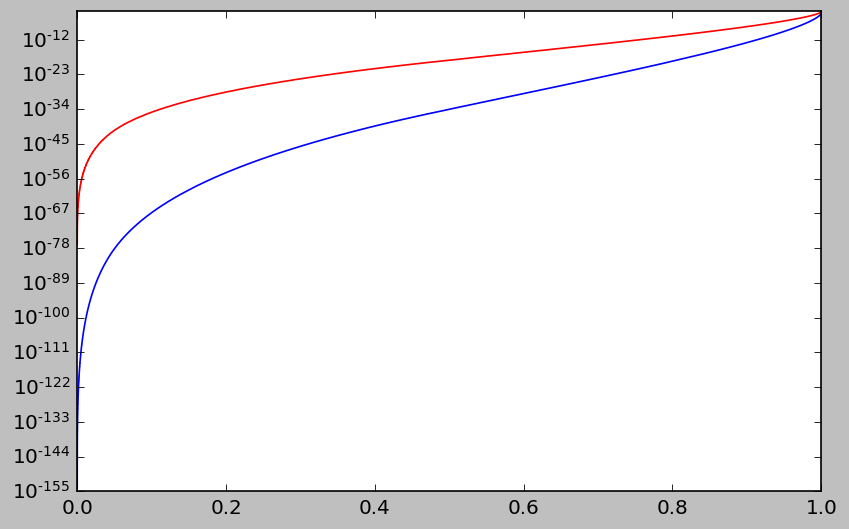

In [31]:
probArray_ordered = np.sort(probArray)
probArray256_ordered = np.sort(probArray256)

fig, (ax1) = plt.subplots(1,1,figsize=(8, 5), dpi=120, frameon=True)
ax1.plot(np.linspace(0,1,np.size(probArray)), probArray_ordered/np.sum(probArray), 'r-', label="Distr")
ax1.plot(np.linspace(0,1,np.size(probArray256)), probArray256_ordered/np.sum(probArray256), 'b-', label="Distr")
ax1.set_yscale('log')
print("total elements=", np.size(probArray/np.sum(probArray)))
print("sum of elements=", np.sum(probArray/np.sum(probArray)))
print("max element=", np.max(probArray/np.sum(probArray)))
print("min element=", np.min(probArray/np.sum(probArray)))

In [34]:
configChoices = choices(combinations, probArray, k=int(1e8))

## Topplings with Dissipation

We're interested in the MM with a bulk dissipation, $\lambda$. 

In the original Manna Model toppling algorithm, $\lambda$ dissipation is done as follows: for each height-unit that is transferred to a neighbor, there is a probability $\lambda$ that the height-unit is instead "dissipated" from the bulk. 

In the _new_ distribution toppling algorithm, we impliment dissipation in the following way: after the final toppled distribution is determined, we consider each of the neighbors that are receiving sand, $h_j$. From this we draw from a binomial distribution (probabilities $\lambda$) for the number of height units that will be kept/thrown out. 

### Distriburtion Rules

In [9]:
def relax_distr_lamb(lattice, lamb,configChoice): 
#     configChoice = choices(combinations, probArray)
    lattice[0] += np.random.binomial(configChoice[0], 1-lamb, size=1)[0]
    lattice[1] += np.random.binomial(configChoice[1], 1-lamb, size=1)[0]
    lattice[2] += np.random.binomial(configChoice[2], 1-lamb, size=1)[0]
    lattice[3] += np.random.binomial(configChoice[3], 1-lamb, size=1)[0]
    return lattice

def computeVar_distr_lamb(hc, lamb, iterN): 
    combinations, probArray = prob_array_1(hc)
    configChoices = choices(combinations, probArray, k=iterN)
    
    avg = (hc/4)*(1-lamb)
    var = 0

    for i in range(iterN): 
        lattice = np.zeros(4)
        lattice = relax_distr_lamb(lattice, lamb, configChoices[i])
        var += np.sum((lattice - avg)**2)
    return np.sqrt(var/4/iterN)

In [ ]:
hc=4
lamb = 1

combinations, probArray = prob_array_1(hc)
configChoices = choices(combinations, probArray, k=1)
    
lattice = np.zeros(4)
lattice = relax_distr_lamb(lattice, lamb, configChoices[0])
print(lattice)

In [ ]:
hc = 4
lamb = 1
iterN = 100000
computeVar_distr_lamb(hc, lamb, iterN)

### Manna Rules

In [ ]:
def relax_mann_lamb(lattice, lamb, hc): 
    randSites = np.random.randint(4, size=hc)
    for randInd in randSites: 
        lattice[randInd] += 1 * lamb_diss_Chance(lamb)
    return lattice

def computeVar_manna_lamb(hc, lamb, iterN): 
    avg = (hc/4)*(1-lamb)
    var = 0

    for i in range(iterN): 
        lattice = np.zeros(4)
        lattice = relax_mann_lamb(lattice, lamb, hc)
        var += np.sum((lattice - avg)**2)
    return np.sqrt(var/4/iterN)

def lamb_diss_Chance(lamb): 
    rng = np.random.uniform(0,1,1)[0]
    if rng <= lamb: 
        return 0
    else: 
        return 1

In [ ]:
heightRange = np.unique(np.logspace(np.log10(2), np.log10(3), 100).astype(int))
lambRange = np.logspace(-5, 0, 50).astype(float)

var_manna = np.zeros(len(lambRange))
for lamb_i, lamb in enumerate(lambRange): 
    print(lamb_i, lamb, end="\r")
    var_manna[lamb_i] = computeVar_manna_lamb(1024, lamb, 10000)

print(var_manna)

In [ ]:
## Testing

computeVar_manna_lamb(1024, 1, 10000)

In [ ]:
for lamb_i, lamb in enumerate(lambRange): 
    print(lamb, var_manna[lamb_i])

### Plotting

Plots_distr/MM_manna_varCompare_dissp.png


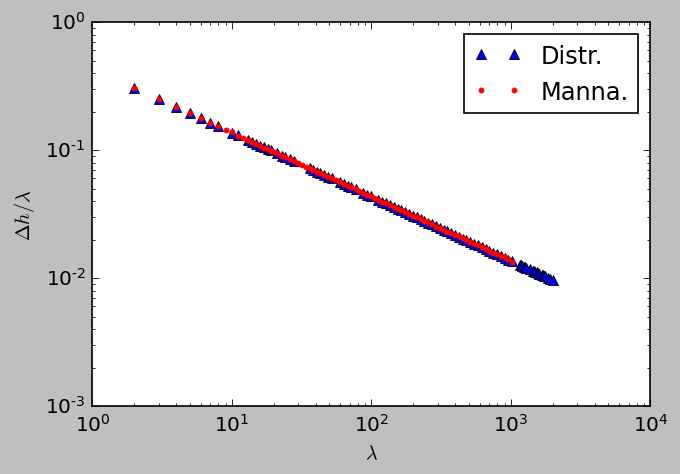

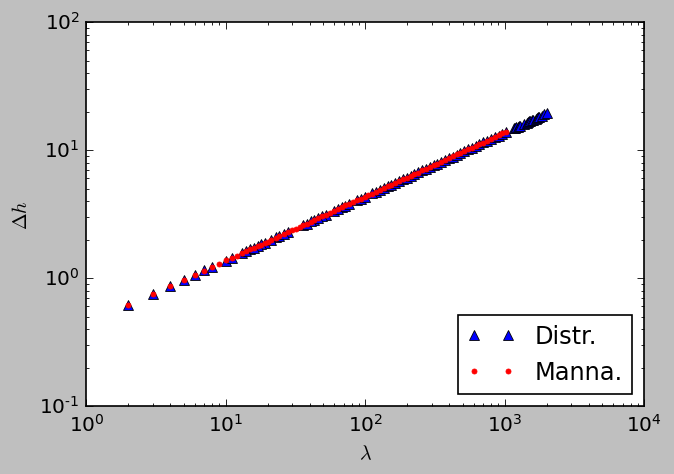

In [81]:
var_manna_intermediateStep = var_manna_string.split('\n')
var_manna_list = []
for i in range(len(var_manna_intermediateStep)): 
    var_manna_list += [var_manna_intermediateStep[i].split(' ')]
    var_manna_list[i][0] = float(var_manna_list[i][0])
    var_manna_list[i][1] = float(var_manna_list[i][1])

var_manna_arr = np.asarray(var_manna_list)


var_distr_intermediateStep = var_distr_string.split('\n')
var_distr_list = []
for i in range(len(var_distr_intermediateStep)): 
    var_distr_list += [var_distr_intermediateStep[i].split(' ')]
    var_distr_list[i][0] = float(var_distr_list[i][0])
    var_distr_list[i][1] = float(var_distr_list[i][1])

var_distr_arr = np.asarray(var_distr_list)


fig, (ax1) = plt.subplots(1,1,figsize=(6, 4), dpi=120)
ax1.plot(var_distr_arr[:,0], var_distr_arr[:,1]/var_distr_arr[:,0], 'b^-', linewidth=0, label="Distr.")
ax1.plot(var_manna_arr[:,0], var_manna_arr[:,1]/var_manna_arr[:,0], 'r.-', linewidth=0, label="Manna.")
ax1.set_ylabel(r'$\Delta h / \lambda$'); ax1.set_xlabel(r'$\lambda$')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.legend()
filename = "Plots_distr/MM_manna_varCompare_dissp.png"
# fig.savefig(filename, dpi=200) 
print(filename)

fig, (ax1) = plt.subplots(1,1,figsize=(6, 4), dpi=120)
ax1.plot(var_distr_arr[:,0], var_distr_arr[:,1], 'b^-', linewidth=0, label="Distr.")
ax1.plot(var_manna_arr[:,0], var_manna_arr[:,1], 'r.-', linewidth=0, label="Manna.")
ax1.set_ylabel(r'$\Delta h$'); ax1.set_xlabel(r'$\lambda$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend(loc=4)


## How quickly does var calc converge? 

### Manna

In [ ]:
def relax_mann(lattice, hc): 
    randSites = np.random.randint(4, size=hc)
    for randInd in randSites: 
        lattice[randInd] += 1
    return lattice

def convergeVar_manna(hc, iterN): 
    avg = hc/4
    var = 0
    var_iter = np.zeros(iterN)
    
    for i in range(iterN): 
        lattice = np.zeros(4)
        lattice = relax_mann(lattice, hc)
        var += np.sum((lattice - avg)**2)
        var_iter[i] = np.sqrt(var/4/(i+1))
    return var_iter

heightRange = [2,4,8,16,32, 64, 128, 256]

iterN = 25000
var_manna = np.zeros((len(heightRange), iterN))

for hc_i, hc in enumerate(heightRange): 
    print(hc, end="\r")
    var_manna[hc_i, :] = convergeVar_manna(hc, iterN)

NameError: name 'var_manna' is not defined

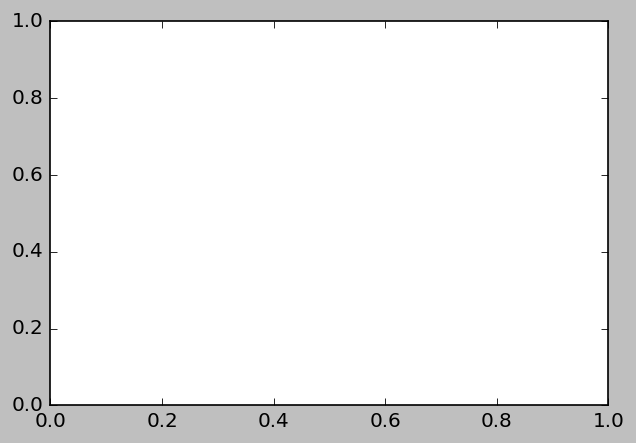

In [82]:
fig, (ax1) = plt.subplots(1,1,figsize=(6, 4), dpi=120)

for hc_i, hc in enumerate(heightRange):
    ax1.plot(var_manna[hc_i,:]/var_manna[hc_i,-1], label="$h_c = $"+str(hc))

ax1.set_ylabel(r'$\Delta h / h_c$'); ax1.set_xlabel(r'$h_c$')
# ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.legend(loc=4, fontsize=8)
ax1.set_title("Manna Rules")
filename = "Plots_distr/MM_manna_varConverge.png"
# fig.savefig(filename, dpi=200) 
print(filename)

### Distr

In [ ]:
def relax_distr(lattice, configChoice): 
    lattice[0] += configChoice[0]
    lattice[1] += configChoice[1]
    lattice[2] += configChoice[2]
    lattice[3] += configChoice[3]
    return lattice

def convergeVar_distr(hc, iterN): 
    combinations, probArray = prob_array_1(hc)
    configChoices = choices(combinations, probArray, k=iterN)
    
    avg = hc/4
    var = 0
    var_iter = np.zeros(iterN)
    
    for i in range(iterN): 
        lattice = np.zeros(4)
        lattice = relax_distr(lattice, configChoices[i])
        var += np.sum((lattice - avg)**2)
        var_iter[i] = np.sqrt(var/4/(i+1))
    return var_iter

heightRange = [2,4,8,16,32, 64, 128, 256]

iterN = 25000
var_distr = np.zeros((len(heightRange), iterN))

for hc_i, hc in enumerate(heightRange): 
    print(hc, end="\r")
    var_distr[hc_i, :] = convergeVar_distr(hc, iterN)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

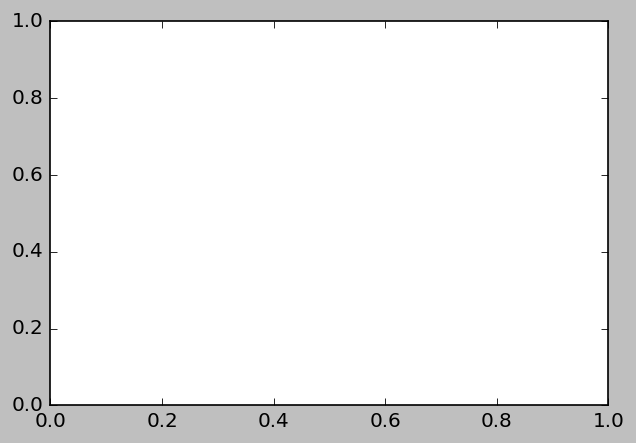

In [80]:
fig, (ax1) = plt.subplots(1,1,figsize=(6, 4), dpi=120)

for hc_i, hc in enumerate(heightRange):
    ax1.plot(var_distr[hc_i,:]/var_distr[hc_i,-1], label="$h_c = $"+str(hc))

ax1.set_ylabel(r'$\Delta h / h_c$'); ax1.set_xlabel(r'$h_c$')
# ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.legend(loc=4, fontsize=8)
ax1.set_title("Distribution Rules")

filename = "Plots_distr/MM_distr_varConverge.png"
# fig.savefig(filename, dpi=200) 
print(filename)

## "Storing" variances as a string and converting to list

In [131]:
var_manna_intermediateStep = var_manna_string.split('\n')
var_manna_list = []
for i in range(len(var_manna_intermediateStep)): 
    var_manna_list += [var_manna_intermediateStep[i].split(' ')]
    var_manna_list[i][0] = float(var_manna_list[i][0])
    var_manna_list[i][1] = float(var_manna_list[i][1])

var_manna_arr = np.asarray(var_manna_list)


var_distr_intermediateStep = var_distr_string.split('\n')
var_distr_list = []
for i in range(len(var_distr_intermediateStep)): 
    var_distr_list += [var_distr_intermediateStep[i].split(' ')]
    var_distr_list[i][0] = float(var_distr_list[i][0])
    var_distr_list[i][1] = float(var_distr_list[i][1])

var_distr_arr = np.asarray(var_distr_list)

### Manna rules as a string: 

In [130]:
var_manna_string = """2 0.6131883886702356
3 0.7507329751649384
4 0.8613361713059542
5 0.9659451330173987
6 1.0637198879404295
7 1.1443775600735975
8 1.2270900537450378
9 1.288720295486961
10 1.3746817813588714
11 1.4257278842752568
12 1.5002166510207784
13 1.5586372252708454
14 1.6210953087341904
15 1.67681245224384
16 1.7288146227979446
17 1.7660973925579528
18 1.827525649614801
19 1.877538281899999
20 1.9175374833363754
21 1.9905275682592292
23 2.071183236703117
24 2.132861927082951
26 2.2079062480096385
28 2.2976509743649056
30 2.3940655797199875
32 2.4396618618161003
34 2.5221022976873875
36 2.6003749729606307
38 2.6536013264995177
41 2.761032415601092
43 2.8323841547360766
46 2.9440278531291106
49 3.0458250113885397
52 3.1383674099760848
56 3.254266430395643
60 3.3538336273583997
64 3.4592918350436985
68 3.591315914814513
72 3.696200752123726
77 3.811889295349486
82 3.9408057551724114
87 4.049691346263317
93 4.180556183093345
99 4.337637605886411
105 4.4378485778584205
112 4.545415272557613
120 4.738960856559168
127 4.867853736504416
136 5.084722214634739
145 5.203863949028645
154 5.3759557289843825
164 5.559343486419957
175 5.699846489160914
186 5.9034566145606595
198 6.098139060401952
211 6.297741658721799
225 6.487838623147157
240 6.6752303331046186
256 6.9680520950980265
272 7.148003217682544
290 7.331991543912199
309 7.597427196097374
329 7.827343099673094
350 8.074444253321712
373 8.354869837406206
397 8.631468588832378
423 8.974661553507184
451 9.280153554764059
480 9.507536484284454
512 9.794250864665454
545 10.142260596139304
580 10.444027001114081
618 10.794584290281863
658 11.081901912578003
701 11.46184322000611
747 11.799241501045735
795 12.21604273077006
847 12.594592093434388
902 13.107431098426572
961 13.494324733012764
1024 13.73489169960943"""

### Distribution rules as a string

In [129]:
var_distr_string = """2 0.6123438576486254
4 0.865800207900183
5 0.9702242008937935
6 1.0605281703000633
7 1.1472074790551183
10 1.3701332052030561
28 2.2912424795293926
23 2.0766662707329746
11 1.4360542120686113
19 1.8875700251911185
15 1.677268672574552
18 1.836907292162563
17 1.785304371808908
13 1.5612386428730234
14 1.6200946885907626
8 1.224815006439748
24 2.120957142424146
21 1.984202509826051
26 2.207250529504977
36 2.5984721280013763
3 0.7500924609673131
16 1.7319186759198597
38 2.669728768995083
52 3.1216092804833857
43 2.8398846807573013
60 3.355312533878178
68 3.571481849316891
64 3.464069355541254
72 3.6744022643145646
77 3.800766317468097
41 2.7720897532367164
49 3.030358510143643
46 2.936619570186101
87 4.040144774633701
93 4.176694745848684
99 4.306623816866293
120 4.744142114228873
112 4.583397146222439
127 4.879644075134989
136 5.048285154386586
145 5.215601048776642
154 5.371952466282627
164 5.544886617416085
175 5.727542806474693
186 5.904725141782639
198 6.092580980175807
211 6.288490812587707
225 6.493460679791632
240 6.708751970374221
256 6.929264961018593
272 7.142383201705156
290 7.37327767685444
309 7.6129657033248215
329 7.852885106761718
350 8.102833578446493
373 8.363523013658778
397 8.62633811069332
423 8.905252551163274
451 9.19486136382708
480 9.483208476038055
512 9.799162076422657
545 10.110008041539828
580 10.427101394922753
618 10.765170175152829
658 11.107245162505418
701 11.470269870408456
747 11.834789622126792
795 12.20684955670381
847 12.600344852423683
902 13.000980932222
961 13.42122992873604
1024 13.857417042869136
1161 14.749675030318464
1186 14.911540232316714
1211 15.067244615390035
1237 15.231282490322343
1263 15.38742778699546
1290 15.558122518478893
1374 16.053911834814592
1433 16.393549152029284
1463 16.55823096227372
1494 16.73436975210002
1526 16.915667923555368
1558 17.09365573831414
1591 17.27149624960154
1660 17.641643877484885
1695 17.829004910538334
1731 18.01832667869023
1767 18.201484554837826
1843 18.58026300944096
1922 18.98412425686263
2005 19.38249505868633"""

### Manna Rules w/ Dissipation

In [105]:
var_manna_string = """1e-05 13.739670354471711
1.2648552168552958e-05 13.84928836231044
1.5998587196060572e-05 13.88430824194727
2.0235896477251556e-05 13.82421576383008
2.559547922699533e-05 13.845897722271328
3.237457542817647e-05 13.969654025656604
4.094915062380427e-05 13.821239908654162
5.1794746792312125e-05 13.950290258794762
6.55128556859551e-05 13.861628788372855
8.286427728546843e-05 13.941043261803816
0.00010481131341546853 13.85350898782835
0.00013257113655901095 13.8815211856829
0.00016768329368110083 13.822437393361735
0.00021209508879201905 13.896973926888512
0.0002682695795279727 13.805260118690294
0.000339322177189533 13.932563581105272
0.00042919342601287783 13.863191018591847
0.0005428675439323859 13.930377009157075
0.0006866488450042998 13.861890147532597
0.000868511373751353 13.871402993819059
0.0010985411419875584 13.87281633109146
0.0013894954943731374 13.932946704194341
0.001757510624854793 13.776952695917084
0.0022229964825261957 13.875311748714546
0.002811768697974231 13.828759753293513
0.0035564803062231283 13.849872491969757
0.004498432668969444 13.803705721313362
0.005689866029018299 13.82567767113742
0.0071968567300115215 13.781848056855928
0.009102981779915217 13.788884052091696
0.011513953993264481 13.859367815025273
0.014563484775012445 13.742553024544417
0.018420699693267165 13.73275849795453
0.023299518105153717 13.6196378386357
0.029470517025518096 13.69927763283235
0.037275937203149416 13.664105495582298
0.04714866363457394 13.634646494584992
0.05963623316594643 13.613974503259703
0.07543120063354623 13.529731776580007
0.09540954763499944 13.301661380030573
0.1206792640639329 13.16883342912659
0.15264179671752334 13.108599304456998
0.19306977288832497 12.84554435916878
0.244205309454865 12.552335067883998
0.30888435964774846 12.151079433140351
0.3906939937054621 11.487187143927612
0.49417133613238384 10.59811101056426
0.6250551925273976 9.310927910171788
0.7906043210907702 7.131804358632676
1.0 0.0"""

### Distr Rules w/ Dissipation

In [104]:
var_distr_string = """1.5998587196060572e-05 13.85954913257821
1e-05 13.856176251387186
1.2648552168552958e-05 13.851637583483996
2.0235896477251556e-05 13.856079266062885
3.237457542817647e-05 13.852775800239314
5.1794746792312125e-05 13.852863413163618
4.094915062380427e-05 13.8565101655167
2.559547922699533e-05 13.8521851979293
0.00021209508879201905 13.853261297912349
0.00016768329368110083 13.855023070686956
0.0005428675439323859 13.851867026168739
0.009102981779915217 13.813051480814874
0.018420699693267165 13.766108382270712
6.55128556859551e-05 13.855045144675378
0.00010481131341546853 13.855764005927197
0.00013257113655901095 13.85415655211169
8.286427728546843e-05 13.85531829556897
0.0002682695795279727 13.850446577823385
0.001757510624854793 13.844094620714662
0.0022229964825261957 13.845616897526762
0.0013894954943731374 13.848274861040025
0.0010985411419875584 13.850912607579046
0.00042919342601287783 13.857626072010003
0.0006866488450042998 13.853510884287102
0.0071968567300115215 13.815536579588997
0.005689866029018299 13.827766597621185
0.000339322177189533 13.85307174797636
0.004498432668969444 13.834385912001292
0.000868511373751353 13.855149432303048
0.002811768697974231 13.841671115474941
0.05963623316594643 13.569138530044665
0.0035564803062231283 13.841236085292868
0.07543120063354623 13.485850216446991
0.15264179671752334 13.073333260154728
0.011513953993264481 13.80212315461944
0.3906939937054621 11.498837592117182
0.014563484775012445 13.78726420927138
0.244205309454865 12.530479576425424
0.30888435964774846 12.100427435743528
1.0 0.0
0.7906043210907702 7.127753844286549
0.49417133613238384 10.634530931849318
0.023299518105153717 13.746241270827108
0.029470517025518096 13.720100791662194
0.04714866363457394 13.62809210774189
0.037275937203149416 13.676252412267264
0.09540954763499944 13.3856776819239
0.1206792640639329 13.256893666089328
0.19306977288832497 12.841013134739118
0.6250551925273976 9.32758832878298"""

## Create SCC scripts to submit a job for given h_c

In [ ]:
def createScript(jobName, hc):
    print("qsub" ,jobName+'.sh')
    filename = 'Scripts_hc/' + jobName + '.sh'
    file = open(filename,"w+")

    file.write("#!/bin/bash -l \n \n" )

    file.write("# Set SCC Project \n")
    file.write("#$ -P bunuc \n")

    file.write("# Specify hard time limit for the job. \n")
    file.write("#   The job will be aborted if it runs longer than this time. \n")
    file.write("#$ -l h_rt=52:00:00 \n \n")

    file.write("# Send an email when the job finishes or if it is aborted (by default no email is sent). \n")
    file.write("#$ -m a \n \n")

    file.write("# Reuest a node with at least 4 GB of memory per core \n")
    file.write("#$ -l mem_per_core=8G \n \n")

    file.write("# Request a paralell environemtn with _ cores \n")
    file.write("#$ -pe omp 1 \n \n")
    
    # ----- Assign Job Name -----
    file.write("# Give job a name \n")
    file.writelines(["#$ -N ", str(jobName), "\n \n"])

    file.write("# Combine output and error files into a single file \n")
    file.write("#$ -j y \n \n")

    file.write("# Specify the output file name \n")
    file.write("#$ -o sand_output.txt \n \n")

    file.write("# Keep track of information related to the current job \n \n")

    file.writelines(["module load python3", "\n \n"])
    file.writelines(["python3 mnm_varCompare.py ", str(hc), "\n \n"])

    file.close()


heightRange = np.unique(np.logspace(np.log10(1024), np.log10(8192), 100).astype(int))

for j in range(len(heightRange)): 
    jobname = 'mm_hc' + str(heightRange[j])
    createScript(jobname, heightRange[j])

In [ ]:
from decimal import Decimal

Decimal(math.factorial(2048)) / Decimal(1003434.2)

In [ ]:
def createScript(jobName, hc, lamb):
    print("qsub" ,jobName+'.sh')
    filename = 'Scripts_lamb/' + jobName + '.sh'
    file = open(filename,"w+")

    file.write("#!/bin/bash -l \n \n" )

    file.write("# Set SCC Project \n")
    file.write("#$ -P bunuc \n")

    file.write("# Specify hard time limit for the job. \n")
    file.write("#   The job will be aborted if it runs longer than this time. \n")
    file.write("#$ -l h_rt=52:00:00 \n \n")

    file.write("# Send an email when the job finishes or if it is aborted (by default no email is sent). \n")
    file.write("#$ -m a \n \n")

    file.write("# Reuest a node with at least 4 GB of memory per core \n")
    file.write("#$ -l mem_per_core=8G \n \n")

    file.write("# Request a paralell environemtn with _ cores \n")
    file.write("#$ -pe omp 1 \n \n")
    
    # ----- Assign Job Name -----
    file.write("# Give job a name \n")
    file.writelines(["#$ -N ", str(jobName), "\n \n"])

    file.write("# Combine output and error files into a single file \n")
    file.write("#$ -j y \n \n")

    file.write("# Specify the output file name \n")
    file.write("#$ -o sand_output.txt \n \n")

    file.write("# Keep track of information related to the current job \n \n")

    file.writelines(["module load python3", "\n \n"])
    file.writelines(["python3 mnm_varCompare.py ", str(hc), " ",str(lamb), "\n \n"])

    file.close()


heightRange = np.unique(np.logspace(np.log10(1024), np.log10(8192), 100).astype(int))
lambRange = np.logspace(-5, 0, 50).astype(float)

for j in range(len(lambRange)): 
    jobname = 'mmD_lamb' + str(lambRange[j])
    createScript(jobname, 1024, lambRange[j])

In [9]:
testRange = np.arange(10)

np.count_nonzero(testRange > 9)

0

# Using/Testing new Multinomial algorithm

In [159]:
import random
# Test call
np.random.multinomial(20, [1/6.]*6, size=1)

def random_Test(): 
    for j in range(1000000): 
        int(L*random.random())
        int(L*random.random())

def random_Test_np(): 
    for j in range(1000000): 
        (L * np.random.rand(2,1)).astype(int)

%time random_Test()
%time random_Test_np()

int(128*random.random())

CPU times: user 226 ms, sys: 2.1 ms, total: 228 ms
Wall time: 230 ms
CPU times: user 1.17 s, sys: 24.4 ms, total: 1.2 s
Wall time: 1.18 s


16

The idea is that are 4 neighbors, so $p = 1/4$ chance for each neighbor. And the number of experiments is equal to the height of the failing site. 

In [135]:
hc = 2
dissp = 0.1
final_configs = np.random.multinomial(hc, [(1-dissp)/4.]*4 + [dissp], size=1)

print(final_configs)
print(final_configs[0])

[[0 1 1 0 0]]
[0 1 1 0 0]


In [126]:
def relax_multi(lattice, configChoice): 
#     configChoice = choices(combinations, probArray)
    lattice[0] += configChoice[0]
    lattice[1] += configChoice[1]
    lattice[2] += configChoice[2]
    lattice[3] += configChoice[3]
    return lattice

def computeVar_multi(hc, dissp, iterN): 
    final_configs = np.random.multinomial(hc, [(1-dissp)/4.]*4 + [dissp], size=1)
    
    avg = (hc/4) * (1-dissp)
    var = 0
    for i in range(iterN): 
        lattice = np.zeros(4)
        lattice = relax_distr(lattice, final_configs[i])
        var += np.sum((lattice - avg)**2)
    return np.sqrt(var/4/iterN)



In [103]:
dissp = 1/30.

hc=2
%time print("hc=", hc, "var=", computeVar_multi(hc, dissp, 100000))
print(" ")

hc=128
%time print("hc=", hc, "var=", computeVar_multi(hc, dissp, 100000))
print(" ")

hc=256
%time print("hc=", hc, "var=", computeVar_multi(hc, dissp, 100000))
print(" ")




hc= 2 var= 0.6053635271471184
CPU times: user 446 ms, sys: 3.55 ms, total: 449 ms
Wall time: 449 ms
 
hc= 128 var= 4.960291826092493
CPU times: user 464 ms, sys: 2.17 ms, total: 466 ms
Wall time: 468 ms
 
hc= 256 var= 7.182051064981367
CPU times: user 456 ms, sys: 1.15 ms, total: 457 ms
Wall time: 457 ms
 


In [132]:
## Height test

heightRange = np.unique(np.logspace(np.log10(2), np.log10(8192), 100).astype(int))
dissp = 0

var_multi_arr = np.zeros((len(heightRange), 2))

for hc_i, hc in enumerate(heightRange): 
    print(hc, end=" ")
    var_multi_arr[hc_i, 0] = hc
    var_multi_arr[hc_i, 1] = computeVar_multi(hc, dissp, 100000)
    
    

2 3 4 5 6 7 8 9 10 11 12 13 15 16 17 19 21 22 24 27 29 31 34 37 41 44 48 52 57 62 68 74 80 87 95 103 112 122 133 145 157 171 186 203 220 240 261 284 309 336 365 397 432 470 511 556 605 658 716 779 847 921 1002 1090 1186 1290 1403 1526 1660 1805 1963 2135 2323 2526 2748 2989 3250 3535 3845 4182 4549 4948 5382 5853 6366 6924 7531 8191 

In [127]:
## Dissp test

lambRange = np.logspace(-5, 0, 50).astype(float)
hc = 1024

var_multi_arr = np.zeros((len(heightRange), 2))

for dissp_i, dissp in enumerate(lambRange):
    print(hc, end=" ")
    var_multi_arr[dissp_i, 0] = dissp
    var_multi_arr[dissp_i, 1] = computeVar_multi(hc, dissp, 100000)
    
    

1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 1024 

## Compare to old distribution code: 

In [71]:
hc=2
%time print("hc=", hc, "var=", computeVar_distr(hc, 100000))
print(" ")

hc=128
%time print("hc=", hc, "var=", computeVar_distr(hc, 100000))
print(" ")

hc=256
%time print("hc=", hc, "var=", computeVar_distr(hc, 100000))
print(" ")



hc= 2 var= 0.612213198158942
CPU times: user 444 ms, sys: 3.22 ms, total: 447 ms
Wall time: 448 ms
 
hc= 128 var= 4.889644670116634
CPU times: user 1.74 s, sys: 24.7 ms, total: 1.76 s
Wall time: 1.76 s
 
hc= 256 var= 6.946985317387679
CPU times: user 13.3 s, sys: 110 ms, total: 13.4 s
Wall time: 13.5 s
 


## Plotting variance differences (hc)

Plots_distr/MM_manna_varCompare_dissp.png


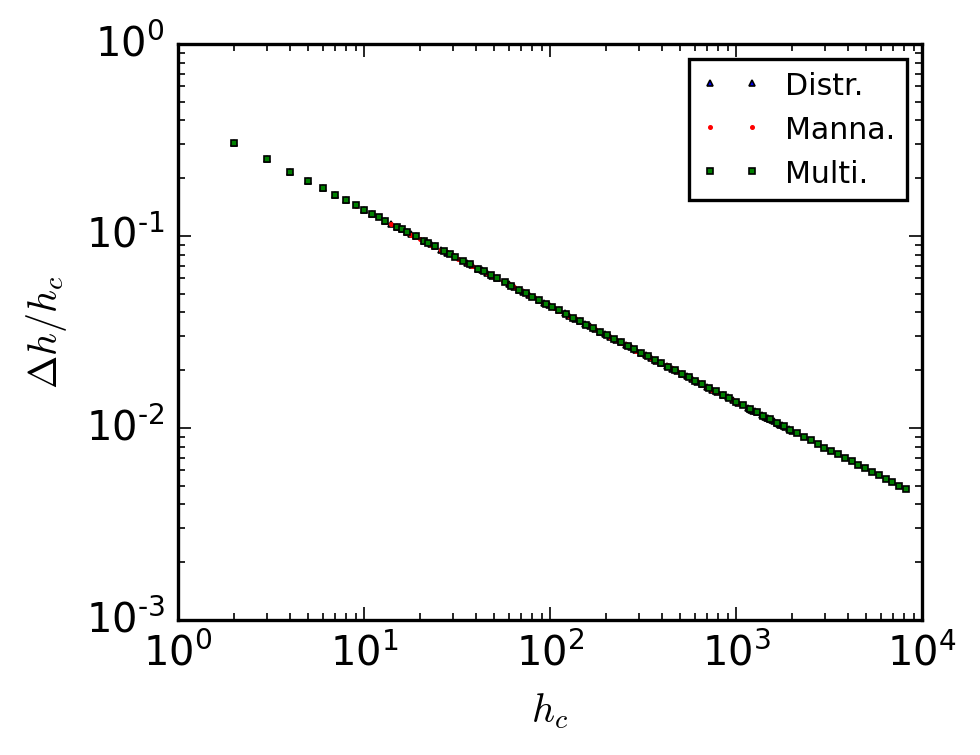

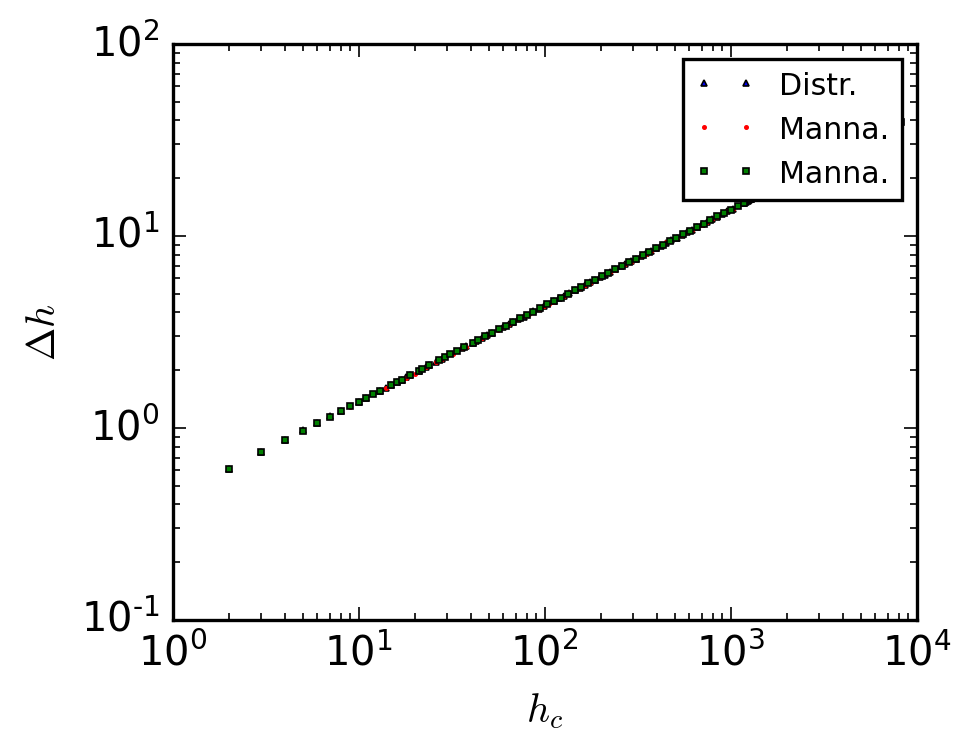

In [133]:
fig, (ax1) = plt.subplots(1,1,figsize=(4, 3), dpi=240, frameon=False)
ax1.plot(var_distr_arr[:,0], var_distr_arr[:,1]/var_distr_arr[:,0], 'b^-', markersize=2, linewidth=0, label="Distr.")
ax1.plot(var_manna_arr[:,0], var_manna_arr[:,1]/var_manna_arr[:,0], 'r.-', markersize=2, linewidth=0, label="Manna.")
ax1.plot(var_multi_arr[:,0], var_multi_arr[:,1]/var_multi_arr[:,0], 'gs-', markersize=2, linewidth=0, label="Multi.")
ax1.set_ylabel(r'$\Delta h / h_c$'); ax1.set_xlabel(r'$h_c$')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.legend(fontsize=9)
filename = "Plots_distr/MM_manna_varCompare_dissp.png"
# fig.savefig(filename, dpi=200) 
print(filename)

fig, (ax1) = plt.subplots(1,1,figsize=(4, 3), dpi=240, frameon=False)
ax1.plot(var_distr_arr[:,0], var_distr_arr[:,1], 'b^-', markersize=2, linewidth=0, label="Distr.")
ax1.plot(var_manna_arr[:,0], var_manna_arr[:,1], 'r.-', markersize=2, linewidth=0, label="Manna.")
ax1.plot(var_multi_arr[:,0], var_multi_arr[:,1], 'gs-', markersize=2, linewidth=0, label="Manna.")
ax1.set_ylabel(r'$\Delta h$'); ax1.set_xlabel(r'$h_c$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend(fontsize=9)




## Plotting variance differences

Plots_distr/MM_manna_varCompare_dissp.png


<ipython-input-128-eedd3bf8356e>:4: RuntimeWarning: invalid value encountered in true_divide
  ax1.plot(var_multi_arr[:,0], var_multi_arr[:,1]/var_multi_arr[:,0], 'gs-', markersize=2, linewidth=0, label="Multi.")


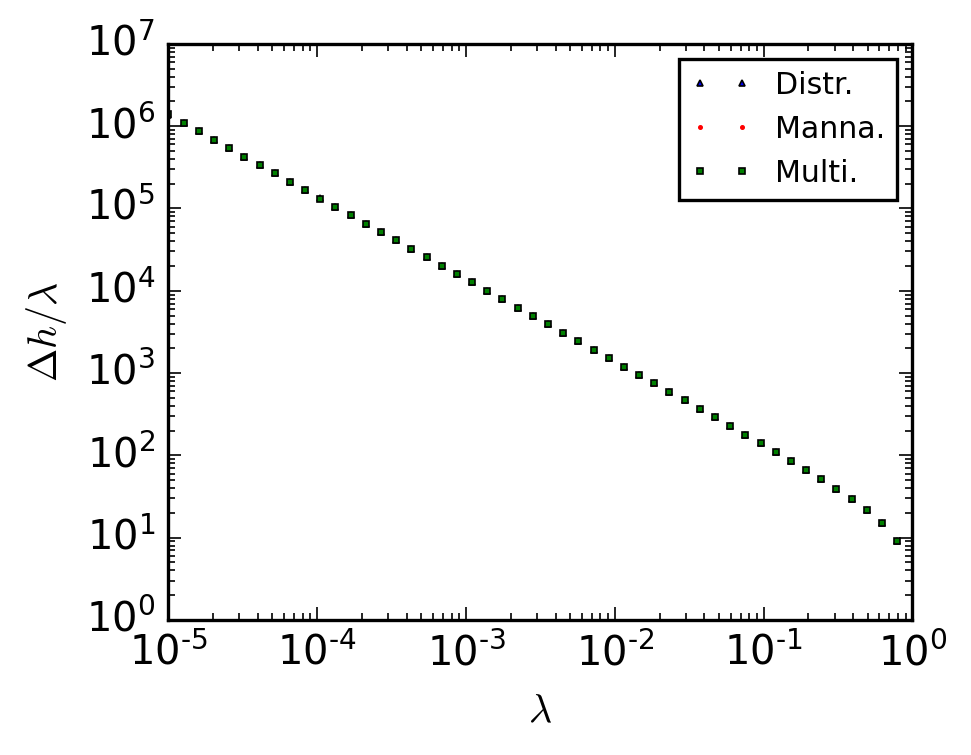

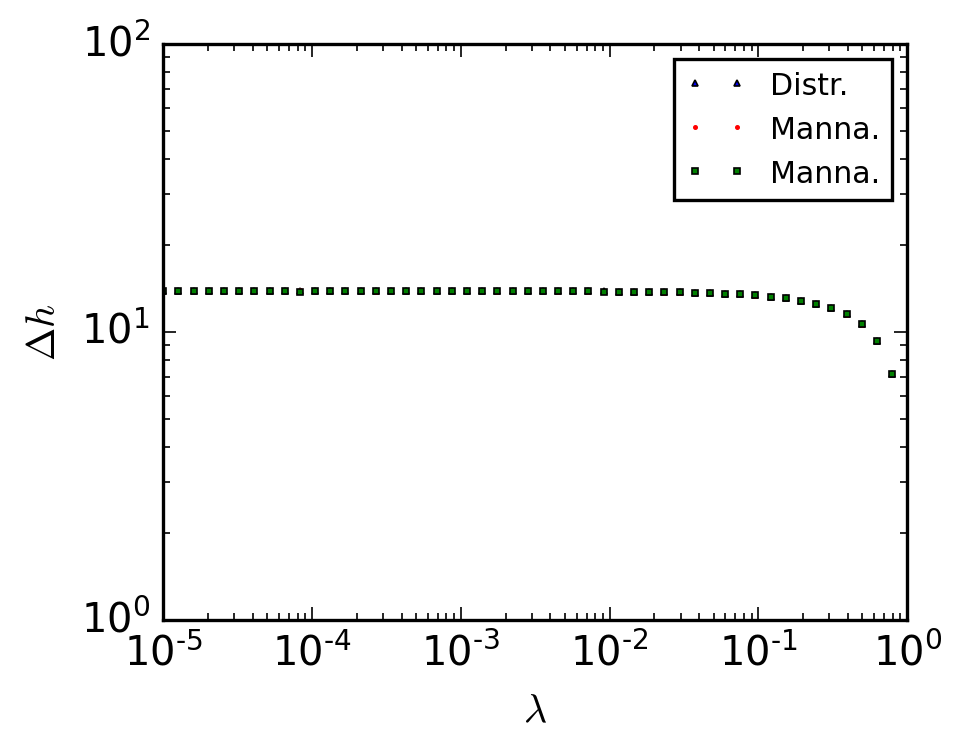

In [128]:
fig, (ax1) = plt.subplots(1,1,figsize=(4, 3), dpi=240, frameon=False)
ax1.plot(var_distr_arr[:,0], var_distr_arr[:,1]/var_distr_arr[:,0], 'b^-', markersize=2, linewidth=0, label="Distr.")
ax1.plot(var_manna_arr[:,0], var_manna_arr[:,1]/var_manna_arr[:,0], 'r.-', markersize=2, linewidth=0, label="Manna.")
ax1.plot(var_multi_arr[:,0], var_multi_arr[:,1]/var_multi_arr[:,0], 'gs-', markersize=2, linewidth=0, label="Multi.")
ax1.set_ylabel(r'$\Delta h / \lambda$'); ax1.set_xlabel(r'$\lambda$')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.legend(fontsize=9)
filename = "Plots_distr/MM_manna_varCompare_dissp.png"
# fig.savefig(filename, dpi=200) 
print(filename)

fig, (ax1) = plt.subplots(1,1,figsize=(4, 3), dpi=240, frameon=False)
ax1.plot(var_distr_arr[:,0], var_distr_arr[:,1], 'b^-', markersize=2, linewidth=0, label="Distr.")
ax1.plot(var_manna_arr[:,0], var_manna_arr[:,1], 'r.-', markersize=2, linewidth=0, label="Manna.")
ax1.plot(var_multi_arr[:,0], var_multi_arr[:,1], 'gs-', markersize=2, linewidth=0, label="Manna.")
ax1.set_ylabel(r'$\Delta h$'); ax1.set_xlabel(r'$\lambda$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend(fontsize=9)



# Simulations and Results

## Full Simulation Code

In [ ]:
def driving_m(lattice, L, hc, lambd, combinations, probArray):
    """
    Randomly choose sites on the lattice to add a height-unit to 
    until one site overcomes the threhsold, hc
    """
    while np.any(lattice < hc): 
        ##Choose a ranom site (assuming 2d lattice)
        site = (L * np.random.rand(2,1)).astype(int)
        lattice[site[0], site[1]] += 1
        
        ##If incrimented site height >= hc, proceed to the toppling rules: 
        if lattice[site[0], site[1]] >= hc:
            avgH = np.sum(lattice)
            lattice, [siz, dur, area, rgs, rga] = relax_m(lattice, L, hc, lambd, combinations, probArray)
            break
            
    return lattice, [siz, dur, area, rgs, rga], avgH


def relax_m(lattice, L, hc, lambd, combinations, probArray):
    """
    Relaxes the (active) lattice to a stable configuration. 
    Returns: avalanche size, area, duration, and corresponding radii of gyration. 
    """
    siz = 0
    dur = 0
    ##Temp Lattice with extra sites for the open boundaries (ease of toppling code). 
    latticeOBC = np.zeros((L+2, L+2))
    latticeOBC[1:-1, 1:-1] = lattice
    ##Lattice-clone to keep track of sites that fired at-least once (for computing area). 
    latticeTriggers = np.zeros_like(lattice)
    
    while(np.any(lattice >= hc)):
        dur += 1
        ##Loop over lattice, checking for sites >= hc that need to be toppled. 
        for x in range( 1, L+1 ):
            for y in range( 1, L+1 ):
                if lattice[x-1,y-1] >= hc:
                    ##Draw final configuartion and set this configuration to the (temp) lattice. 
                    configChoice = choices(combinations, probArray, k=1)[0]
                    latticeOBC[x,y] -= hc
                    latticeOBC[x+1,y] += np.random.binomial(configChoice[0], 1-lambd, size=1)[0]
                    latticeOBC[x-1,y] += np.random.binomial(configChoice[1], 1-lambd, size=1)[0]
                    latticeOBC[x,y+1] += np.random.binomial(configChoice[2], 1-lambd, size=1)[0]
                    latticeOBC[x,y-1] += np.random.binomial(configChoice[3], 1-lambd, size=1)[0]
                    ##Also record the site that triggered
                    latticeTriggers[x-1,y-1] += 1
                    
        ##Reset the boundaries to be 0 (so they never get too big)
        latticeOBC[:,0] = 0; latticeOBC[:,-1] = 0
        latticeOBC[0,:] = 0; latticeOBC[-1,:] = 0
        ## Set the new (temp) lattice onto the real (recorded) lattice. 
        lattice = latticeOBC[1:-1, 1:-1]
    siz = np.sum(latticeTriggers) #Size = total number of sites that toppled
    area = np.count_nonzero(latticeTriggers) #Area = total number of sites that toppled at least once. 
    
    # Compute the radius of Gyration (s/a)
    rsx=0; rsy=0; rax=0; ray = 0; rgs = 0; rga = 0
    for x in range(0, L):
        for y in range(0,L):
            rsx += x * latticeTriggers[x,y] / siz
            rsy += y * latticeTriggers[x,y] / siz
            rax += x * latticeTriggers[x,y] / (latticeTriggers[x,y] - 0.001) / area
            ray += y * latticeTriggers[x,y] / (latticeTriggers[x,y] - 0.001) / area
    for x in range(0, L):
        for y in range(0,L):
            rgs += latticeTriggers[x,y]/siz * ( (x-rsx)**2 + (y - rsy)**2)
            rga += latticeTriggers[x,y] / (latticeTriggers[x,y] - 0.001) / area * ( (x-rax)**2 + (y - ray)**2)            
        
    return lattice, [siz, dur, area, rgs, rga]

def relax_distr_lamb(lattice, lamb, configChoice): 
    lattice[0] += np.random.binomial(configChoice[0], 1-lamb, size=1)[0]
    lattice[1] += np.random.binomial(configChoice[1], 1-lamb, size=1)[0]
    lattice[2] += np.random.binomial(configChoice[2], 1-lamb, size=1)[0]
    lattice[3] += np.random.binomial(configChoice[3], 1-lamb, size=1)[0]
    return lattice

In [ ]:
def runSystem_m(lattice, L, hc, lambd,timer):
    
    combinations, probArray = prob_array_1(hc)
    print("config probs computed")
    
    lattice = lattice.astype(int)
    sizList = []
    durList = []
    areList = []
    rgsList = []
    rgaList = []
    HList = []
    counter = 0
    while counter < timer: 
        print('driving: '+str(counter+1), end='\r')
        lattice, results, avgH = driving_m(lattice, L, hc, lambd, combinations, probArray)
        
        if results[0]>0: 
            sizList += [results[0]]
            durList += [results[1]]
            areList += [results[2]]
            rgsList += [results[3]]
            rgaList += [results[4]]
            HList += [avgH]
            counter += 1        
            
    np.set_printoptions(threshold=np.inf)
    print('\n')
    print(L,lambd,timer)
    print("Sizes:")
    print(np.array2string(np.asarray(sizList), separator=','))
    print('Durations:')
    print(np.array2string(np.asarray(durList), separator=','))
    print('Areas:')
    print(np.array2string(np.asarray(areList), separator=','))
#     print('\n')
#     print(np.array2string(np.asarray(rgsList), separator=','))
#     print('\n')
#     print(np.array2string(np.asarray(rgaList), separator=','))
    
    return sizList,durList,areList, rgsList, rgaList, HList

In [ ]:
L = 64
hc = 4
timer = 5000
lattice = (hc-1)*np.random.rand(L,L)

print('starting')

sizList0 , durList0 , areList0 , rgsList0 , rgaList0 , HList0 = runSystem_m(lattice, L, hc, 0.1, timer)


In [ ]:
fig, (ax1) = plt.subplots(1,1,figsize=(6, 4), dpi=120)

ax1.hist(sizList0, bins=np.logspace(np.log10(1),np.log10(1000.0), 50))
ax1.plot(np.linspace(1, 100, 100), 1750*np.linspace(1, 100, 100)**(-1.15), 'k--')

ax1.set_ylabel(r'$\Delta h / h_c$'); ax1.set_xlabel(r'$h_c$')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_title("Distribution Rules")


## Create SCC scripts to submit a job for given h_c

In [7]:
def createScript(jobName, hc, lamb, seed):
    print("qsub" ,jobName+'.sh')
    filename = 'Scripts_fortran/' + jobName + '.sh'
    file = open(filename,"w+")

    file.write("#!/bin/bash -l \n \n" )

    file.write("# Set SCC Project \n")
    file.write("#$ -P bunuc \n")

    file.write("# Specify hard time limit for the job. \n")
    file.write("#   The job will be aborted if it runs longer than this time. \n")
    file.write("#$ -l h_rt=120:00:00 \n \n")

    file.write("# Reuest a node with at least 4 GB of memory per core \n")
    file.write("#$ -l mem_per_core=4G \n \n")

    file.write("# Request a paralell environemtn with _ cores \n")
    file.write("#$ -pe omp 1 \n \n")
    
    # ----- Assign Job Name -----
    file.write("# Give job a name \n")
    file.writelines(["#$ -N ", str(jobName), "\n \n"])

    file.write("# Combine output and error files into a single file \n")
    file.write("#$ -j y \n \n")
    
    file.write("# Specify the output file name \n")
    file.write("#$ -o results/"+jobname+"_out.txt \n \n")

    file.write("# Keep track of information related to the current job \n \n")
    
    file.write("declare -i timer=5000000 \n \n")
    file.write("declare -i L=1000 \n \n")
    file.write("driv="+str(int(hc))+" \n \n")
    file.write("dissp="+str(lamb)+" \n \n")
    file.write("declare -i rand="+str(seed)+" \n \n")

    file.writelines(["echo -e \"$timer\\n$L\\n$dissp\\n$driv\\n$rand\" |  ./sandpile \n \n"])

    file.close()

heightRange = np.round(2**(np.unique(np.arange(8,18, 0.5))))
lambdaRange = 10**np.arange(-6, -1, 0.25).astype(float)

setRange = np.zeros((len(heightRange), len(lambdaRange),2))

for j in range(len(heightRange)): 
    for k in range(len(lambdaRange)): 
        setRange[j,k,0] = heightRange[j]
        setRange[j,k,1] = lambdaRange[k]

fixed_SetRange = setRange.transpose(2,0,1).reshape(2,-1)
for j in range(len(fixed_SetRange[0,:])): 
#     print(fixed_SetRange[:,j])
    
    jobname = 'sp_' + str(1000+j)
    createScript(jobname, fixed_SetRange[0,j], fixed_SetRange[1,j], 1000+j)

qsub sp_1000.sh
qsub sp_1001.sh
qsub sp_1002.sh
qsub sp_1003.sh
qsub sp_1004.sh
qsub sp_1005.sh
qsub sp_1006.sh
qsub sp_1007.sh
qsub sp_1008.sh
qsub sp_1009.sh
qsub sp_1010.sh
qsub sp_1011.sh
qsub sp_1012.sh
qsub sp_1013.sh
qsub sp_1014.sh
qsub sp_1015.sh
qsub sp_1016.sh
qsub sp_1017.sh
qsub sp_1018.sh
qsub sp_1019.sh
qsub sp_1020.sh
qsub sp_1021.sh
qsub sp_1022.sh
qsub sp_1023.sh
qsub sp_1024.sh
qsub sp_1025.sh
qsub sp_1026.sh
qsub sp_1027.sh
qsub sp_1028.sh
qsub sp_1029.sh
qsub sp_1030.sh
qsub sp_1031.sh
qsub sp_1032.sh
qsub sp_1033.sh
qsub sp_1034.sh
qsub sp_1035.sh
qsub sp_1036.sh
qsub sp_1037.sh
qsub sp_1038.sh
qsub sp_1039.sh
qsub sp_1040.sh
qsub sp_1041.sh
qsub sp_1042.sh
qsub sp_1043.sh
qsub sp_1044.sh
qsub sp_1045.sh
qsub sp_1046.sh
qsub sp_1047.sh
qsub sp_1048.sh
qsub sp_1049.sh
qsub sp_1050.sh
qsub sp_1051.sh
qsub sp_1052.sh
qsub sp_1053.sh
qsub sp_1054.sh
qsub sp_1055.sh
qsub sp_1056.sh
qsub sp_1057.sh
qsub sp_1058.sh
qsub sp_1059.sh
qsub sp_1060.sh
qsub sp_1061.sh
qsub sp_

## Plotting Distributions

In [13]:
obs_type = "s"
hc = heightRange[1]
lamb = lambdaRange[0]

filename = "Data_hc_simil/mm_"+str(hc)+"_"+str(lamb)+"_"+obs_type+".txt"
print(filename)
sizeS = np.loadtxt(filename, skiprows=1)

Data_hc_simil/mm_256_1e-05_s.txt


Data_hc_simil/mm_256_1e-05_s.txt
5000


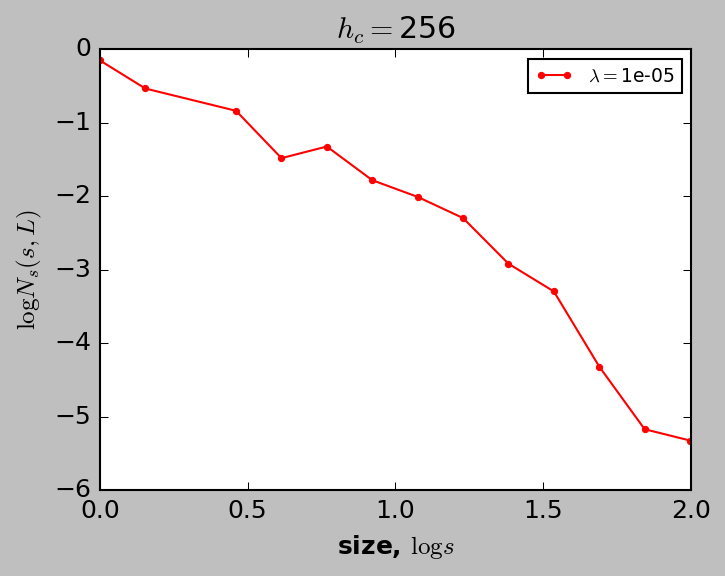

In [22]:
def plotSizes_raw(hc, lamb, obs_type):
    """
    Plot log-log size histogram (log-binned)""
    """
    filename = "Data_hc_simil/mm_"+str(hc)+"_"+str(lamb)+"_"+obs_type+".txt"
    print(filename)
    sizeS = np.loadtxt(filename, skiprows=1)
    print(len(sizeS))
    
    sizeS_Log = np.asarray(sizeS)
    hist, bin_edges = np.histogram(sizeS_Log,bins=np.logspace(0,25,50,base=2),density=True)
    for i in range(len(hist)-1,-1,-1):      # Delete any 0 counts. 
        if hist[i]==0:
            hist = np.delete(hist,i)
            bin_edges = np.delete(bin_edges,i)   
    return bin_edges[:-1], hist

fig, ax1 = plt.subplots(1,1,figsize=(5, 4), dpi=150, frameon=True)

x,y = plotSizes_raw(hc, lamb, obs_type);  
x = np.log10(x); y = np.log10(y)

ax1.plot(x, y, '.-', color='r', label = r"$\lambda=$"+str(round(lamb,6)))
ax1.legend(fontsize=9)
ax1.set_title(r"$h_c=$"+str(hc))
ax1.set_ylabel(r'$\log N_s(s,L)$',fontweight='bold'); 
ax1.set_xlabel('size, $\log s$',fontweight='bold')
fig.tight_layout()